<a href="https://colab.research.google.com/github/thopiyawan/DEMO_rami_dialogflow/blob/master/621130237_piyawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import data, exposure, img_as_float
from skimage import util
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>
262144
(512, 512)


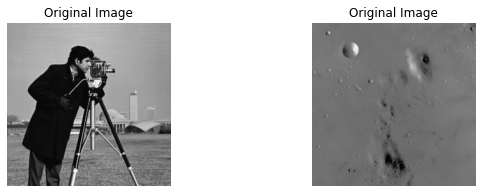

In [2]:
# Load an image from SKIMAGE of scikit-image
image_cam = data.camera() # read the image
print(type(image_cam)) # Image in array format
print(image_cam.size) # Array image size
print(image_cam.shape) # Width and Height of image
# display the image
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.imshow(image_cam, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')
# Load an image from SKIMAGE of scikit-image
image_moon = data.moon() # read the image
plt.subplot(1,2,2)
plt.imshow(image_moon, cmap='gray') # display the image
plt.title('Original Image')
plt.axis('off')
plt.show()


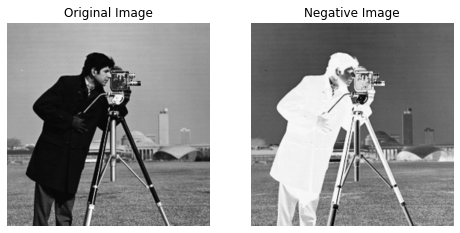

In [3]:
# inverted_img = util.invert(image)
imgage_inverse = 255 - image_cam
# display the image
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1,
figsize=(8, 4),
sharex=True,
sharey=True)
ax1.imshow(image_cam, cmap='gray')
ax1.title.set_text('Original Image')
ax1.set_axis_off()
ax2.imshow(imgage_inverse, cmap='gray')
ax2.title.set_text('Negative Image')
ax2.set_axis_off()
plt.show()


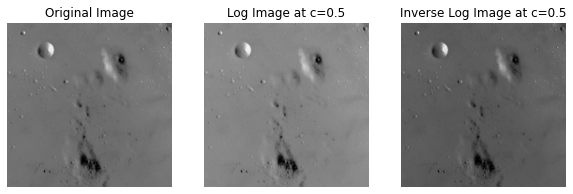

In [5]:
# skimage.exposure.adjust_log(image, gain=1, inv=False)
# gain range 0 to 1
# Log
image_log = exposure.adjust_log(image_moon, 0.5)
# Inverse Log
image_invlog = exposure.adjust_log(image_moon, 0.5, inv=True)
# display the image
fig, ax = plt.subplots(ncols=3, nrows=1,
figsize=(10, 4),
sharex=True,
sharey=True)
ax[0].imshow(image_moon, cmap='gray')
ax[0].title.set_text('Original Image')
ax[1].imshow(image_log, cmap='gray')
ax[1].title.set_text('Log Image at c=0.5')
ax[2].imshow(image_invlog, cmap='gray')
ax[2].title.set_text('Inverse Log Image at c=0.5')
for aa in ax:
  aa.set_axis_off()
plt.show()


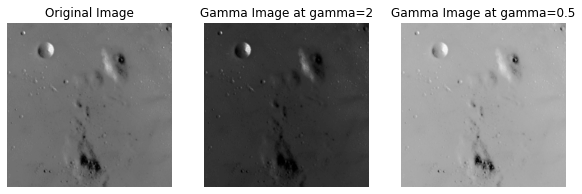

In [7]:
# Gamma
# skimage.exposure.adjust_gamma(image, gamma=1, gain=1)
image_gamma_1 = exposure.adjust_gamma(image_moon, 2, 1)
image_gamma_2 = exposure.adjust_gamma(image_moon, 0.5, 1)
# display the image
fig, ax = plt.subplots(ncols=3, nrows=1,
figsize=(10, 4),
sharex=True,
sharey=True)
ax[0].imshow(image_moon, cmap='gray')
ax[0].title.set_text('Original Image')
ax[1].imshow(image_gamma_1, cmap='gray')
ax[1].title.set_text('Gamma Image at gamma=2')
ax[2].imshow(image_gamma_2, cmap='gray')
ax[2].title.set_text('Gamma Image at gamma=0.5')
for aa in ax:
  aa.set_axis_off()
plt.show()


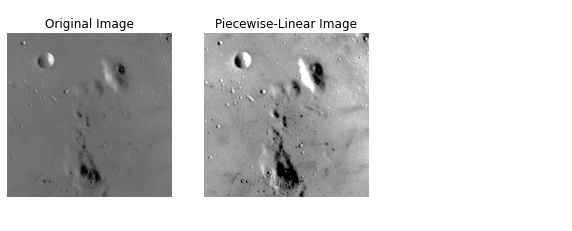

In [9]:
# Function to map each intensity level to output intensity level.
def pixelVal(pix, r1, s1, r2, s2):
  if (0 <= pix and pix <= r1):
    return (s1 / r1)*pix
  elif (r1 < pix and pix <= r2):
    return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
  else:
    return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
# Apply contrast stretching.
image_piecewise = pixelVal_vec(image_moon, r1, s1, r2, s2)
# display the image
fig, ax = plt.subplots(ncols=3, nrows=1,
figsize=(10, 4),
sharex=True,
sharey=True)
ax[0].imshow(image_moon, cmap='gray')
ax[0].title.set_text('Original Image')
ax[1].imshow(image_piecewise, cmap='gray')
ax[1].title.set_text('Piecewise-Linear Image')
for aa in ax:
  aa.set_axis_off()
plt.show()

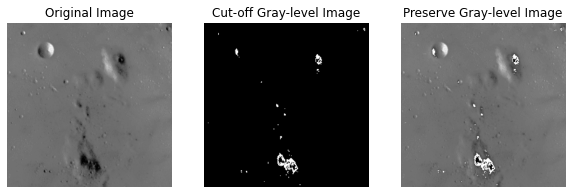

In [13]:
# Find width and height of image
row, column = image_moon.shape
# Create an zeros array to store the sliced image
image_grayslicing = np.zeros((row,column),dtype = 'uint8')
# Create an zeros array to store the sliced image
image_grayslicing2 = np.zeros((row,column),dtype = 'uint8')
# Specify the min and max range
min_range = 10
max_range = 60
# Loop over the input image and
# if pixel value lies in desired range set it to 255
# otherwise set it to 0.
for i in range(row):
  for j in range(column):
   if image_moon[i,j]>min_range and image_moon[i,j]<max_range:
      image_grayslicing[i,j] = 255
   else:
      image_grayslicing[i,j] = 0
# Loop over the input image and
# if pixel value lies in desired range set it to 255
# otherwise preserve its value.
for i in range(row):
  for j in range(column):
    if image_moon[i,j]>min_range and image_moon[i,j]<max_range:
        image_grayslicing2[i,j] = 255
    else:
        image_grayslicing2[i,j] = image_moon[i,j]
# display the image
fig, ax = plt.subplots(ncols=3, nrows=1,
figsize=(10, 4),
sharex=True,
sharey=True)
ax[0].imshow(image_moon, cmap='gray')
ax[0].title.set_text('Original Image')
ax[1].imshow(image_grayslicing, cmap='gray')
ax[1].title.set_text('Cut-off Gray-level Image')
ax[2].imshow(image_grayslicing2, cmap='gray')
ax[2].title.set_text('Preserve Gray-level Image')
for aa in ax:
  aa.set_axis_off()
plt.show()
